First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  

Dataset Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min 

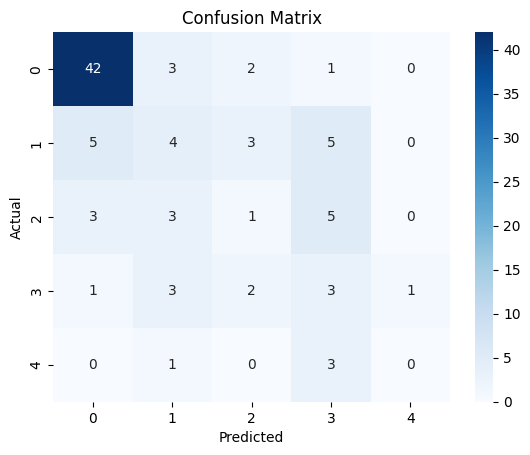

In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# 📌 Step 2: Load the dataset using ucimlrepo
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Load Heart Disease dataset (ID 45)
heart = fetch_ucirepo(id=45)

# Prepare features and labels
X = heart.data.features
y = heart.data.targets

# Merge into a single DataFrame for exploration
df = pd.concat([X, y.rename(columns={'num': 'target'})], axis=1)

# 📌 Step 3: Explore the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Summary:")
print(df.describe())
print("\nClass distribution:")
print(df['target'].value_counts())

# 📌 Step 4: Data Preprocessing
X = df.drop('target', axis=1)  # Features
y = df['target']              # Labels (0 = No Heart Disease, 1 = Heart Disease)

# Handle missing values using imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X) # Impute missing values

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 📌 Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Step 6: Train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 📌 Step 7: Make predictions
y_pred = model.predict(X_test)

# 📌 Step 8: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 📌 Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()